## Exploratory Analysis for Machine Learning - Course Project

The course project will review John Hollinger's NBA Advanced Statistics, namely Player Efficiency Rating (PER)

PER is considered an advanced statistic that takes into account all of a players positive/negative contributions to a game and returns them in a single, weighted measure

****Data dictionary****:

Each observation represents an individual player's Hollinger stats for that season. Columns and their appropriate definition follows as detailed by ESPN.com are as follows:

rank that player's PER rank for that given season

ts% True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]

ast Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

to Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

usg Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)

orr Offensive rebound rate

drr Defensive rebound rate

rebr Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]

per Player Efficiency Rating is the overall rating of a player's per-minute statistical production. The league average is 15.00 every season.

va Value Added - the estimated number of points a player adds to a teamâ€™s season total above what a 'replacement player' (for instance, the 12th man on the roster) would produce. Value Added = ([Minutes * (PER - PRL)] / 67). PRL (Position Replacement Level) = 11.5 for power forwards, 11.0 for point guards, 10.6 for centers, 10.5 for shooting guards and small forwards

ewa Estimated Wins Added - Value Added divided by 30, giving the estimated number of wins a player adds to a team's season total above what a 'replacement player' would produce.

per ER - sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance

season that observation's season

player player name

team that player's team abbreviation for which they play

### Explorartory Data Analysis

Initial Plan:
 
- download data from Kaggle datasets 
- impoer/read data and clean
- want to explore the relationship between usage rate and per on an aggregate, then a more 'zoomed in' basis
- want to show a general trend of players efficiency rising as their usage rises (better players being used more)
- want to evaluate for a star players career, to see if they 'age in' to being kore efficient with increased usage

#### Data Loading & Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits as mp
import mpl_toolkits
import seaborn as sns
sns.set()

In [2]:
# read in the data:
# data downloaded and saved as a csv from Kaggle datasets
data = pd.read_csv('hollingersStats.csv')
data.head()

,Unnamed: 0,rank,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,player,team,season
0,1,1,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,31.01,452.0,15.1,Tracy McGrady,ORL,2002-03
1,2,2,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,29.43,356.2,11.9,Shaquille O'Neal,LAL,2002-03
2,3,3,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,27.07,420.6,14.0,Kobe Bryant,LAL,2002-03
3,4,4,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,26.46,370.8,12.4,Kevin Garnett,MIN,2002-03
4,5,5,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,26.46,355.0,11.8,Tim Duncan,SA,2002-03


In [3]:
# get the shape of the data and data types
print('Number of Rows:' , data.shape[0])
print('Number of Columns', data.shape[1])
data.info()

Number of Rows: 5404
Number of Columns 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 17 columns):
Unnamed: 0    5404 non-null int64
rank          5404 non-null int64
gp            5404 non-null int64
mpg           5404 non-null float64
ts%           5404 non-null float64
ast           5404 non-null float64
to            5404 non-null float64
usg           5404 non-null float64
orr           5404 non-null float64
drr           5404 non-null float64
rebr          5404 non-null float64
per           5404 non-null float64
va            5404 non-null float64
ewa           5404 non-null float64
player        5404 non-null object
team          5404 non-null object
season        5404 non-null object
dtypes: float64(11), int64(3), object(3)
memory usage: 717.8+ KB


Note that for all entries (5404 rows/records) there are non-null values

In [4]:
# get the unique seasons the dataset covers
print(len(data['season'].unique().tolist()), 'seasons')

16 seasons


In [5]:
# only interested in a players PER and usage rate data:
performance_data = data[['season', 'player', 'usg', 'per']]
print('Number of Rows:' , performance_data.shape[0])
print('Number of Columns', performance_data.shape[1])

performance_data.head()

Number of Rows: 5404
Number of Columns 4


,season,player,usg,per
0,2002-03,Tracy McGrady,32.6,31.01
1,2002-03,Shaquille O'Neal,27.8,29.43
2,2002-03,Kobe Bryant,31.1,27.07
3,2002-03,Kevin Garnett,25.0,26.46
4,2002-03,Tim Duncan,25.7,26.46


In [6]:
# check data for null/missing values: already checked above, but again for completeness
check_na = performance_data.isnull()

# get a count of null (True) vs non-null (False)
print('Season: ', check_na['season'].value_counts())
print('Player: ', check_na['player'].value_counts())
print('Usage: ', check_na['usg'].value_counts())
print('PER: ', check_na['per'].value_counts())

Season:  False    5404
Name: season, dtype: int64
Player:  False    5404
Name: player, dtype: int64
Usage:  False    5404
Name: usg, dtype: int64
PER:  False    5404
Name: per, dtype: int64


The data shows all 5404 rows are populated for each feature of interest

#### Exploratory Analysis (PER vs Usage)

Aggregate Correlation between PER and Usage:  0.6594763097855708


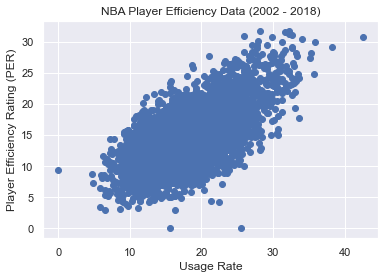

In [7]:
# Scatter plot of Per vs Usage Rate - aggregate data set
y = performance_data['per']
x = performance_data['usg']

corr = y.corr(x)
print('Aggregate Correlation between PER and Usage: ', corr)

plt.scatter(x, y)
plt.title('NBA Player Efficiency Data (2002 - 2018)')
plt.xlabel('Usage Rate')
plt.ylabel('Player Efficiency Rating (PER)')
plt.show()

Lets look more into the variance of PER vs Usage, as there seems to be a definite correlation between the two features

Will prepare data frame for usage 'bins' and look at the distribution of data within each

Text(0.5, 0, 'PER and Usage - same axis')

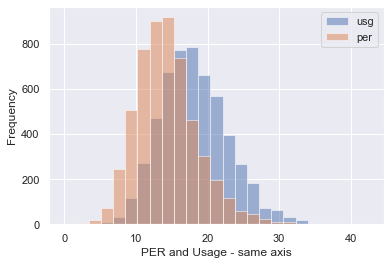

In [8]:
# histogram with each feature (PER, Usage) on the same histogram - aggregate data

ax = performance_data.plot.hist(bins=25, alpha=0.5) # alpha controls transparency of colors
ax.set_xlabel('PER and Usage - same axis')

We see, althuogh the absolute values in each differ slightly, that the histogram shapes of the 2 variables are quite similar

Each has a very small skew, but can be easily approximated as a normal distribution

In [9]:
# evaluate equal bins of PER/Usage data 
# Will 'bin' usage data but eliminate outliers via IQR
q25, q50, q75 = np.percentile(performance_data['usg'], [25, 50, 75])
iqr = q75 - q25

# derermine min and max values to be determined an outlier
min = round(q25 - iqr, 1)
max = round(q75 + iqr, 1)

print(min, max)

8.3 27.5


See the max, min to be considered outliers in usage rate is 8.3 and 27.5 - we will eliminate usage rates above and below these thresholds for further analysis

In [10]:
# first, remove values below 8.3 and above 27.5
# will rename perf_data to save a copy of performance_data (aggregate clean data)
perf_data = performance_data[performance_data['usg'] >= 8.3]
perf_data = performance_data[performance_data['usg'] <= 27.5]

# now want to bin the data into equal quartiles
des = perf_data['usg'].describe()

q1 = des['25%']
q2 = des['50%']
q3 = des['75%']

print('Q1:', q1, 'Q2:', q2, 'Q3:', q3)

# summary statistics to ensure data now holds the proper usage rate bounds
perf_data.describe()

Q1: 14.6 Q2: 17.5 Q3: 20.7


,usg,per
count,5233.000000,5233.000000
mean,17.669176,13.990010
std,4.243311,3.927384
min,0.000000,0.000000
25%,14.600000,11.230000
50%,17.500000,13.760000
75%,20.700000,16.370000
max,27.500000,30.890000


In [11]:
# now will apply binning to the data frame
bin_list = []
bin
for i in perf_data['usg']:
    if i >= q3 and i < max:
        bin = 4
        bin_list.append(bin)
    elif i >= q2 and i < q3:
        bin = 3
        bin_list.append(bin)
    elif i >= q1 and i < q2:
        bin = 2
        bin_list.append(bin)
    elif i >= min and i < q1:
        bin = 1
        bin_list.append(bin)
    else:
        bin = 0
        bin_list.append(bin)

perf_data['bin'] = bin_list
perf_data.head()

C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,season,player,usg,per,bin
3,2002-03,Kevin Garnett,25.0,26.46,4
4,2002-03,Tim Duncan,25.7,26.46,4
5,2002-03,Dirk Nowitzki,24.8,25.94,4
6,2002-03,Steve Nash,24.0,23.51,4
8,2002-03,Sam Cassell,25.2,23.08,4


Text(0.5, 1.0, 'PER across Usage Bins')

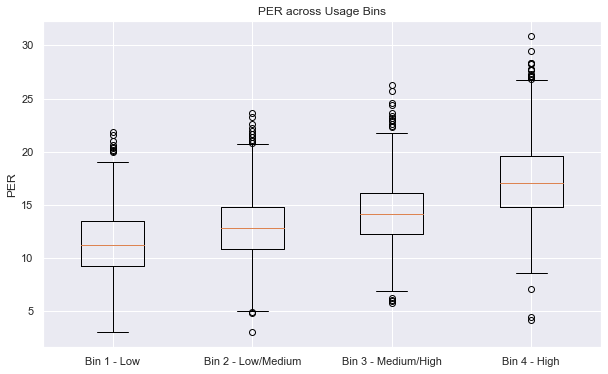

In [12]:
# evaluate each usage bin and its corresponding per data with boxplots
# perf data 1: low usage
perf_data1 = perf_data[perf_data['bin'] == 1]
perf_data1 = perf_data1[perf_data1['per'] > 0]

# perf data 2: Low/medium usage
perf_data2 = perf_data[perf_data['bin'] == 2]
perf_data2 = perf_data2[perf_data2['per'] > 0]

# perf data 3: medium/high usage
perf_data3 = perf_data[perf_data['bin'] == 3]
perf_data3 = perf_data3[perf_data3['per'] > 0]

# perf data 4: high usage
perf_data4 = perf_data[perf_data['bin'] == 4]
perf_data4 = perf_data4[perf_data4['per'] > 0]

# plotting box plots:
plot_dict = {'Bin 1 - Low': perf_data1['per'], 'Bin 2 - Low/Medium': perf_data2['per'], 'Bin 3 - Medium/High': perf_data3['per'], 'Bin 4 - High': perf_data4['per']}

fig, ax= plt.subplots(figsize = (10, 6))

ax.boxplot(plot_dict.values())

ax.set_xticklabels(plot_dict.keys())

plt.ylabel('PER')
plt.title('PER across Usage Bins')

Aggregate Correlation between PER and Usage - no outliers:  0.5958718391502422


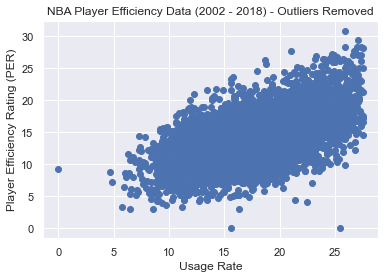

In [13]:
# scatter plot of cleaned/outlier-free data
y = perf_data['per']
x = perf_data['usg']

corr = y.corr(x)
print('Aggregate Correlation between PER and Usage - no outliers: ', corr)

plt.scatter(x, y)
plt.title('NBA Player Efficiency Data (2002 - 2018) - Outliers Removed')
plt.xlabel('Usage Rate')
plt.ylabel('Player Efficiency Rating (PER)')
plt.show()

Text(0.5, 0, 'PER')

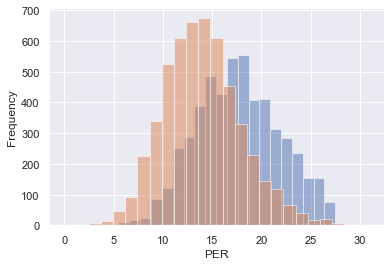

In [14]:
# histogram plots of the cleaned/outlier-free data
ax1 = perf_data['usg'].plot.hist(bins=25, alpha=0.5) # alpha controls transparency of colors
ax1.set_xlabel('Usage Rate')

ax2 = perf_data['per'].plot.hist(bins=25, alpha=0.5)
ax2.set_xlabel('PER')

Again, evaluating across box plots/bins, we see a fairly linear relationship emerging: the mean PER is rising as usage rises (would need to zom in further to see if the relationship, on a sample, is linear or more of a polynomial)

Additionally, checking distributions of each parameter (PER, Usage), they appear to be approximated by a normal distribution

#### Correlation between PER and Usage

From a simple scatter plot, as well as the more advanced overlayed histograms and box plots, it seems there is a relationship between PER and Usage. Lets test this via correlation coefficients

In [15]:
# first, at the aggregate level (all data)
y1 = performance_data['per']
x1 = performance_data['usg']
agg_corr = y1.corr(x1)

# next on the data w/o outliers
y2 = perf_data['per']
x2 = perf_data['usg']
no_outliers_corr = y2.corr(x2)

# next on each bin
# Bin 4: High Usage
y3 = perf_data4['per']
x3 = perf_data4['usg']
high_usage_corr = y3.corr(x3)

# Bin 3: Med/High Usage
y4 = perf_data3['per']
x4 = perf_data3['usg']
med_high_usage_corr = y4.corr(x4)

# Bin 2: Low/Med Usage
y5 = perf_data2['per']
x5 = perf_data2['usg']
low_med_usage_corr = y5.corr(x5)

# Bin 1: Low Usage
y6 = perf_data1['per']
x6 = perf_data1['usg']
low_usage_corr = y6.corr(x6)


print('Efficiency and Usage correlation - Aggregate Level: ', agg_corr)
print('Efficiency and Usage correlation - Outliers Removed: ', no_outliers_corr)

Efficiency and Usage correlation - Aggregate Level:  0.6594763097855708
Efficiency and Usage correlation - Outliers Removed:  0.5958718391502422


The 2 variables (PER and Usage) have a moderate positive correlation

- When looking at aggregate data, players with higher usage are more efficient
- However, there are outliers. When removed, the correlation becomes slightly weaker

### Hypothesis Forumlation and Testing

#### Hypothesis 1: In general, a players efficiency rises when usage rises

In general, this helps explain why certain players get the ball more often, and like separates stars from other players

- Null Hypothesis (Ho): in general, a players efficiency will rise with increasing usage
- Alternative Hypithesis (Ha): no correlation between usage and efficiency

Formal Test: On both an aggregate, and aggregate with outliers removed basis, there is a moderately strong correlation between the two features (usage and efficiency). Based on this, we *****accept***** the null hypothesis

#### Hypothesis 2: On a 'zoomed in' level, a players efficiency increase with usage

#### Hypothesis 3: A star player will 'age in' to their career and show increasing efficiency with increasing usage

### Next Steps in analyzing this data

Based on the relationships defined thus far, the following is suggested:

- taking the analysis further: given the reasonable correlation (at the aggregate level) and the distribution of the features within the data set, the set looks like a good candidate for predictive modeling
- it would be wise to add age/expereince, as well as some measure of whether the player is a star/starter/role player, to the data set for each player. This was we could create a predictive model that takes into account the following to predict a players efficiency:
    - usage
    - age/experience
    - minutes played: to define a players role - not all players PER profile will grow/mature in the same way (more talented players (stars) should expect a bigger experience related jump)
- at a first glance, the following analysis are considered:
    - Linear (or Polynomial) Regression: if using minutes played as a measure of player role
    - Clustering Algorithm: if we introduce a classification of player role (Star, Bench/Role player etc)
- Note that minutes played per game is already included in the original data set

### Summary of Data Quality

Overall, the quality of this data set was excellent, as highlighted by

- a lack of null data
- the relatively small amount of nonsensical data that needed to be removed for analysis
- the fact that the data set was large enough that the features of interest we're essentially norally distributed, even before outlier removal

For additional analysis it would be advisable to include the age/NBA experience of each player. This can likely be done by creating a list of birth date (Age calculsted from there) and rookie season (to calculate experience). The additional data could come in the form of a table. Alternatively it ccan be web-scraped from multiple sources and merged (on player name) with the existing data